<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Machine_Learning_Data_Science_Python/blob/master/notebooks/T11%20-%203%20-%20Reconocimiento%20de%20texto%20escrito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El dataset de MNIST

In [0]:
!pip install tensorflow==1.2

In [2]:
import tensorflow as tf
print(tf.__version__)

1.2.0


In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# import tensorflow_datasets as tfds
# Construct a tf.data.Dataset
# dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) # "one_hot = True" coloca un ceros y true en el dato

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
len(mnist.train.images)

55000

In [5]:
len(mnist.test.images)

10000

In [0]:
im_temp = mnist.train.images[0]# imagen temporal
im_temp

In [0]:
from skimage import io
import numpy as np

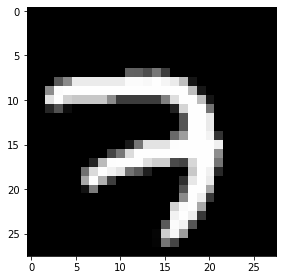

In [15]:
io.imshow(np.reshape(im_temp, (28,28)))
# redimenciona im_temp en un tamaño de 28x28

In [29]:
mnist.train.labels[0] # etiqueta en binario

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Una red neuronal con Tensor Flow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del datset es un número real entre 0 y 1. que indica la cantida de color 

y = softmax(W * x + b)

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10])) 
b = tf.Variable(tf.zeros([10]))

In [0]:
# FORMA DE FUNCION PARAMETRIZADO
dim_input = 784
n_categories = 10

In [0]:
x = tf.placeholder(tf.float32, [None, dim_input])
# lo que haces es aplanar la imagen en un espacio vectorial de dim_input = 784 dimensiones  

In [0]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories])) #  Desviacion

In [0]:
softmax_args = tf.matmul(x,W) + b # "matmul": MULTIPLICACION DE MATRIZES 
y_hat = tf.nn.softmax(softmax_args)# "nn.softmax": Neurnal newort (softmax: sumara y divira por la clases a los argumentos de softmax)

#### Entrenando la red neuronal
* Loss / Cost <- objetivo minimizar las pérdidas

In [0]:
!pip install IPython

In [0]:
from IPython.display import display, Math, Latex

In [41]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

# display(Math("$$H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})$$"))

<IPython.core.display.Math object>

In [0]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [0]:
# ENTROPIA CRUZADA DE  DE FORMA MATEMATICAS
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))
#-tf.reduce_sum: sumara todo los elementos solo de la segunda dimencion "reduction_indices=[1]"
#reduce_mean: Calculara el promedio de todas todas las muestras del dataset
#tf.log(y_hat): ejecucion de logaritmo por Tensor flow a cada uno de los elementos de "y_hat" y se multiplica por cada un de "y_ "

In [0]:
# HACE LA MISMA OPERACION DE  ENTROPIAS CRUZADA
# tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [0]:
# COMO SERA ENTRENADA LA NEURONA:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#GradientDescentOptimizer: Gradiente descendiente  0.5 = 50%

In [0]:
session = tf.InteractiveSession()

In [0]:
tf.global_variables_initializer().run()

In [0]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150)
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

#### Evaluando la red neuronal



In [0]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [0]:
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9254
